# Calculation of sea ice cover for each model

## Objective

The objective here is to extract the sea ice variable from the interpolated files and calculate the average monthly sea ice area over the entire reference period (1995-2014). These values ​​must then be extracted for further analysis. A quick visualization of the sea ice area in map form will also be carried out to quickly see if certain models appear to be poorly simulating sea ice visually.

In [1]:
from watermark import watermark
%load_ext watermark
print(watermark())

Last updated: 2025-07-16T14:19:24.342283+00:00

Python implementation: CPython
Python version       : 3.12.8
IPython version      : 8.17.2

Compiler    : GCC 13.3.0
OS          : Linux
Release     : 6.8.0-63-generic
Machine     : x86_64
Processor   : x86_64
CPU cores   : 8
Architecture: 64bit



In [2]:
import sys
import os

# Chemin absolu vers le dossier codes_ORL_evaluation
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))

# Ajout du chemin au sys.path
if project_root not in sys.path:
    sys.path.insert(0, project_root)

print("Projet root ajouté au path:", project_root)

Projet root ajouté au path: /home/jovyan/M2_SeaIce_project


In [3]:
from module import *

/srv/conda/envs/notebook/lib/python3.12/site-packages/esmpy/interface/loadESMF.py:94: VersionWarning: ESMF installation version 8.8.0, ESMPy version 8.8.0b0
  warnings.warn("ESMF installation version {}, ESMPy version {}".format(


In [4]:
%watermark --iversions

numpy     : 2.0.2
csv       : 1.0
xesmf     : 0.8.8
xarray    : 2025.1.1
pandas    : 2.2.3
cartopy   : 0.24.0
cdo       : 1.6.1
sys       : 3.12.8 | packaged by conda-forge | (main, Dec  5 2024, 14:24:40) [GCC 13.3.0]
matplotlib: 3.10.0
seaborn   : 0.13.2
netCDF4   : 1.7.2
skimage   : 0.25.0
watermark : 2.5.0



### Creating a list with all historical files

In [5]:
files = os.listdir("/home/jovyan/private-storage/output_data/sea_ice_interp/")

nc_files = [filename for filename in files if filename.endswith(".nc")]
nc_files

['BCC-CSM2-MR_hist_reprojete.nc',
 'CAMS-CSM1-0_hist_reprojete.nc',
 'CESM2_hist_reprojete.nc',
 'CESM2-WACCM_hist_reprojete.nc',
 'CNRM-CM6-1_hist_reprojete.nc',
 'CNRM-CM6-1-HR_hist_reprojete.nc',
 'CanESM5_hist_reprojete.nc',
 'FGOALS-f3-L_hist_reprojete.nc',
 'FIO-ESM-2-0_hist_reprojete.nc',
 'GFDL-CM4_hist_reprojete.nc',
 'GFDL-ESM4_hist_reprojete.nc',
 'INM-CM4-8_hist_reprojete.nc',
 'INM-CM5-0_hist_reprojete.nc',
 'IPSL-CM6A-LR_hist_reprojete.nc',
 'MIROC-ES2L_hist_reprojete.nc',
 'MIROC6_hist_reprojete.nc',
 'MPI-ESM1-2-HR_hist_reprojete.nc',
 'MRI-ESM2-0_hist_reprojete.nc',
 'NESM3_hist_reprojete.nc']

### Northern Hemisphere

### Displaying sea ice cover maps and creating a dictionary with numerical area values

La variable 'siconc' est en %. Conversion en fraction.


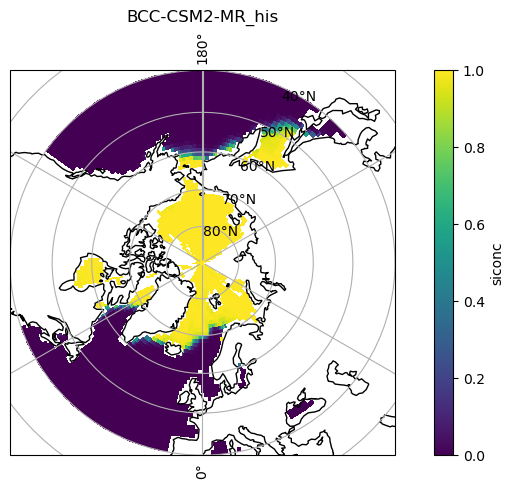

La variable 'siconc' est en %. Conversion en fraction.


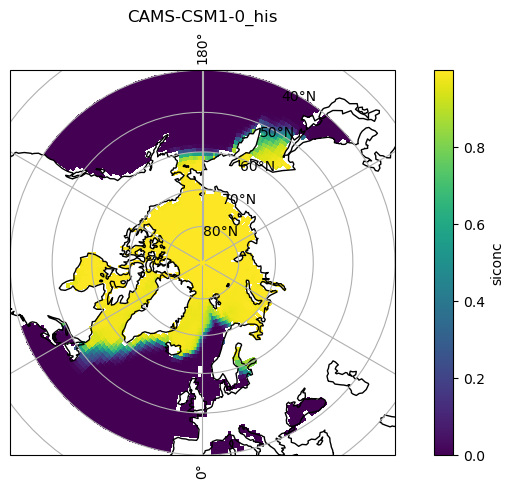

La variable 'siconc' est en %. Conversion en fraction.


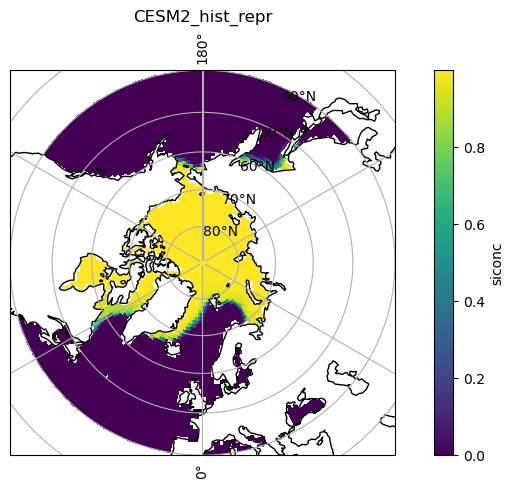

La variable 'siconc' est en %. Conversion en fraction.


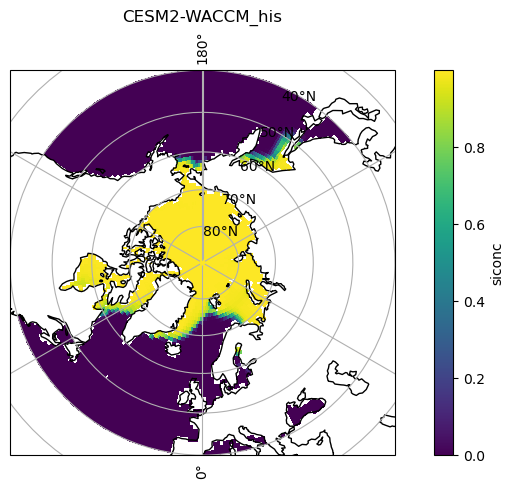

La variable 'siconc' est en %. Conversion en fraction.


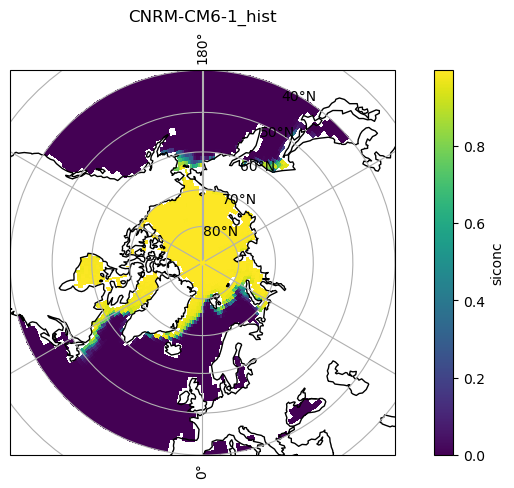

La variable 'siconc' est en %. Conversion en fraction.


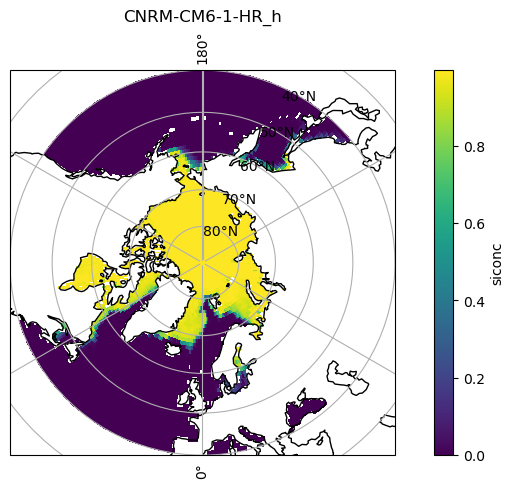

La variable 'siconc' est en %. Conversion en fraction.


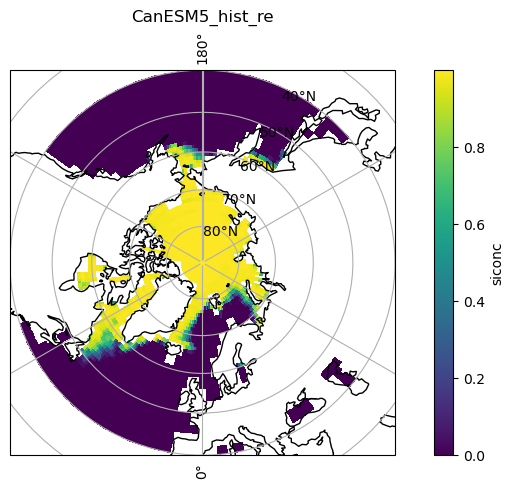

La variable 'siconc' est en %. Conversion en fraction.


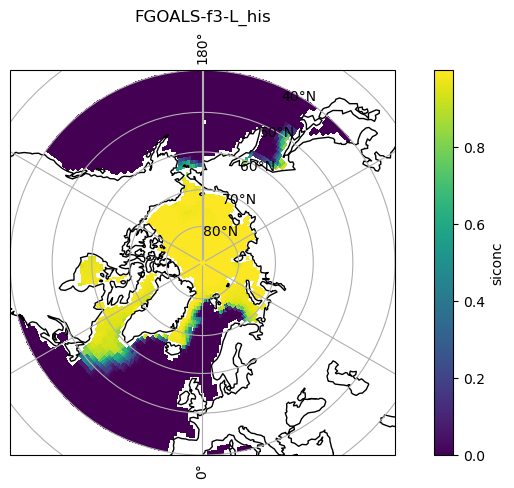

La variable 'siconc' est en %. Conversion en fraction.


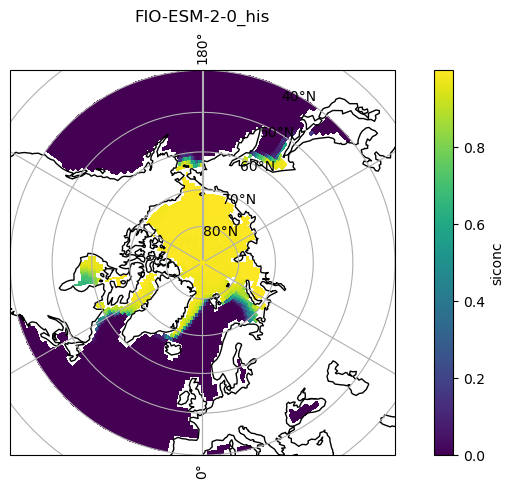

La variable 'siconc' est en %. Conversion en fraction.


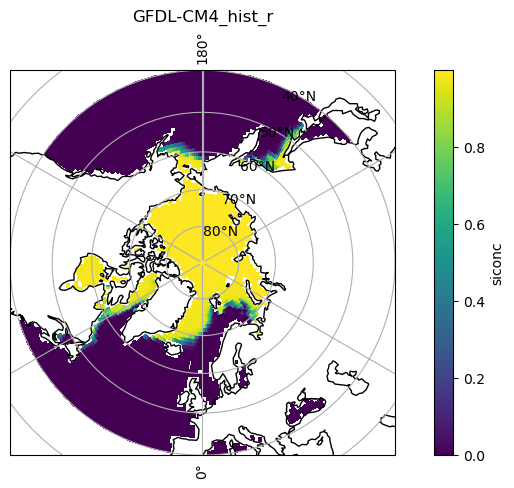

La variable 'siconc' est en %. Conversion en fraction.


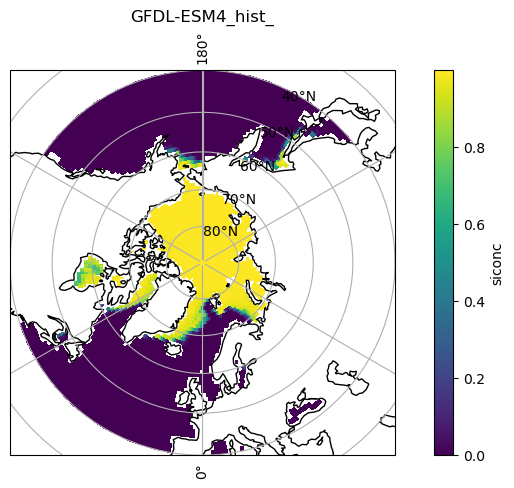

La variable 'siconc' est en %. Conversion en fraction.


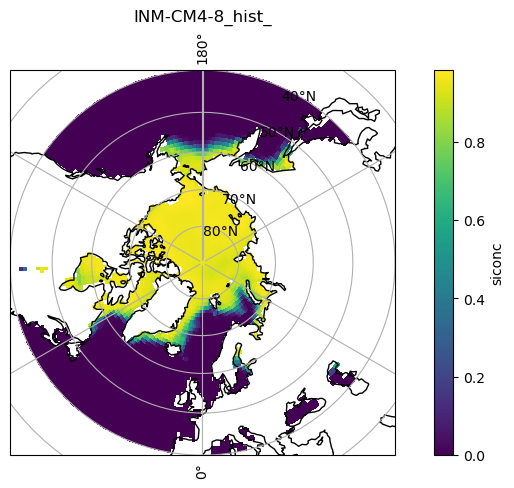

La variable 'siconc' est en %. Conversion en fraction.


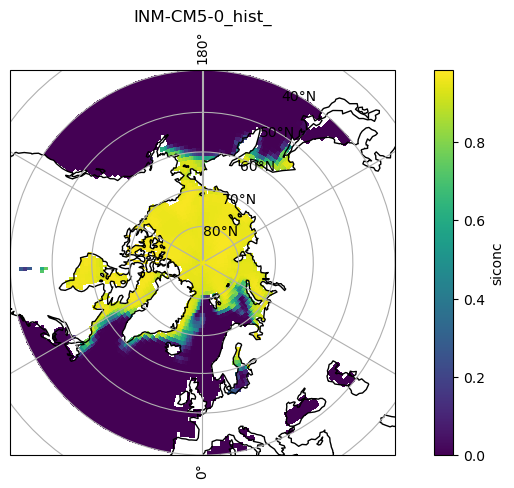

La variable 'siconc' est en %. Conversion en fraction.


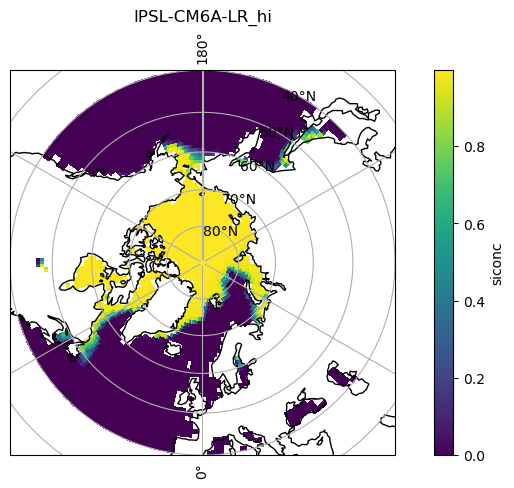

La variable 'siconc' est en %. Conversion en fraction.


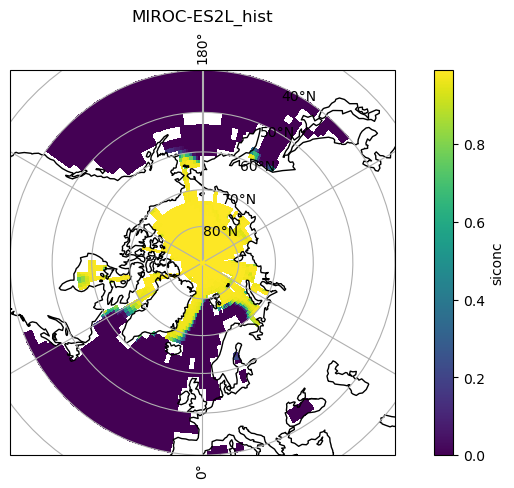

La variable 'siconc' est en %. Conversion en fraction.


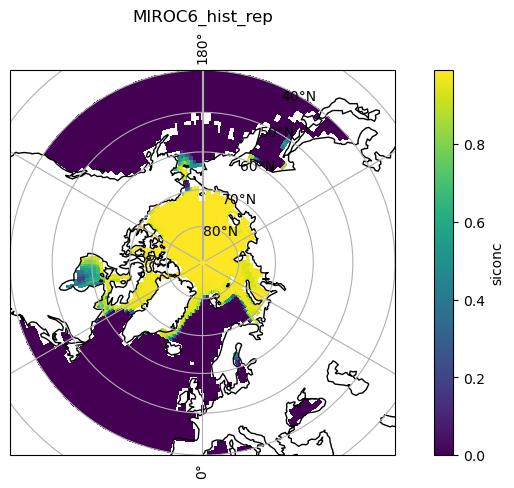

La variable 'siconc' est en %. Conversion en fraction.


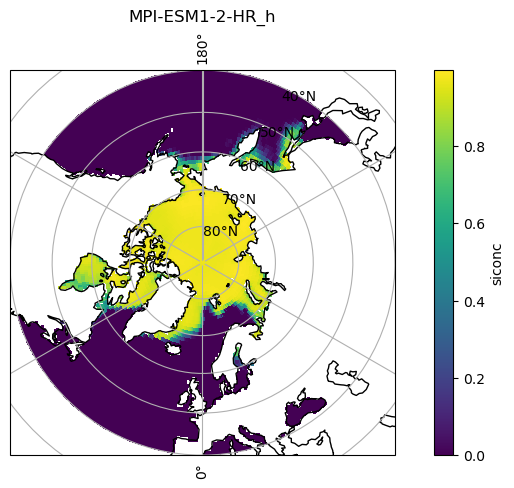

La variable 'siconc' est en %. Conversion en fraction.


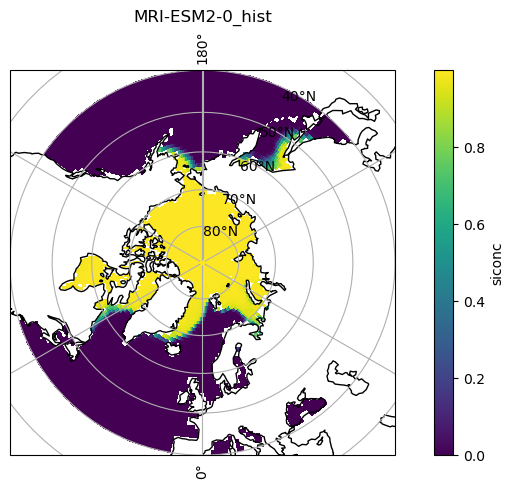

La variable 'siconc' est en %. Conversion en fraction.


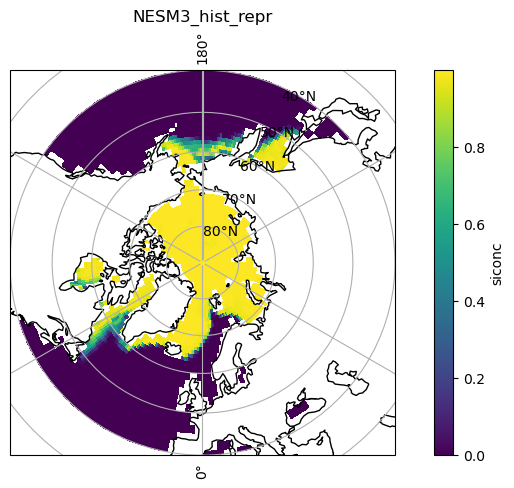

In [6]:
seaice_cover_dict = {}

for i, files in enumerate(nc_files):
    model_name = files.split("_")[0]
    
    path_siconc = os.path.join("/home/jovyan/private-storage/output_data/sea_ice_interp/", files)
    path_areacella = os.path.join("/home/jovyan/private-storage/output_data/areacella_recalcule", files.replace("hist_reprojete", "gridarea_hist_recalcule"))
    path_sftlf = os.path.join("/home/jovyan/private-storage/output_data/interp_sftlf/", files.replace("hist", "sftlf"))
                                 
    # use of functions defined in the module
    ds_siconc, ds_area, ds_sftlf = get_data(path_siconc, path_areacella, path_sftlf)
    siconc, seaice_cover, monthly_mean = extraction_variable_and_monthly_mean(ds_siconc, sftlf=ds_sftlf["sftlf"])
    areacella = ds_area["cell_area"]
    seaice_cover_km2 = seaice_surface_calculation(seaice_cover, areacella)
    seaice_cover_dict[model_name] = seaice_cover_km2

    plot_seaice_cover_basic(siconc, title=files[:15])
    
    ds_siconc.close()
    ds_area.close()

In [7]:
print(seaice_cover_dict)

{'BCC-CSM2-MR': <xarray.DataArray (month: 12)> Size: 96B
array([8283959.67650169, 8872194.43691277, 9109439.21585369,
       8669836.85695002, 7468210.91755611, 5691946.89262128,
       3714298.06003465, 2347986.20622155, 2334280.83294598,
       3630890.8173778 , 5428243.64112011, 6973879.91734042])
Coordinates:
  * month    (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12
    type     |S7 7B b'sea_ice', 'CAMS-CSM1-0': <xarray.DataArray (month: 12)> Size: 96B
array([15644855.0253746 , 16766479.22392469, 16780777.06052066,
       15651762.28284634, 13157606.61090426, 10526678.45963036,
        7844996.83169611,  6323511.30341476,  6563152.57273983,
        8318665.91263132, 10788560.50808541, 13572451.63187593])
Coordinates:
  * month    (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12
    type     |S7 7B b'sea_ice', 'CESM2': <xarray.DataArray (month: 12)> Size: 96B
array([10742076.50834503, 11362865.67304993, 11565349.50881947,
       11237607.59075784,  9963541.2317402 ,  8237293.93402138,
 

This dictionary displays all the values of sea ice area for each model and month.

In [8]:
# save the dictionary as a csv file
dictionnaire_to_csv(seaice_cover_dict, "/home/jovyan/private-storage/output_data/seaice_cover_per_model.csv")

✅ Fichier CSV sauvegardé : /home/jovyan/private-storage/output_data/seaice_cover_per_model.csv


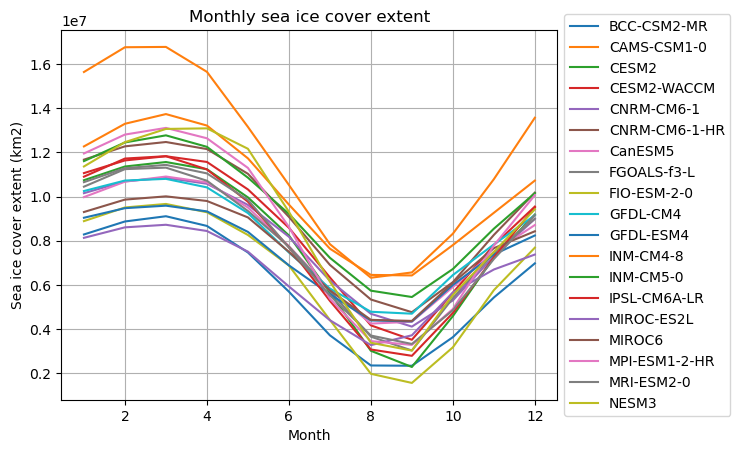

In [9]:
# plot the sea ice cover extent for all the models
for model, values in seaice_cover_dict.items():
    values.plot(label=model)

plt.title("Monthly sea ice cover extent")
plt.xlabel("Month")
plt.ylabel("Sea ice cover extent (km2)")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.grid()
plt.show()

### Southern Hemisphere

### Displaying sea ice cover maps and creating a dictionary with numerical area values

La variable 'siconc' est en %. Conversion en fraction.


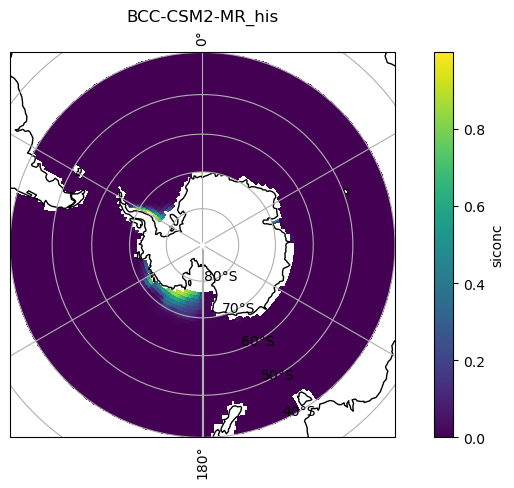

La variable 'siconc' est en %. Conversion en fraction.


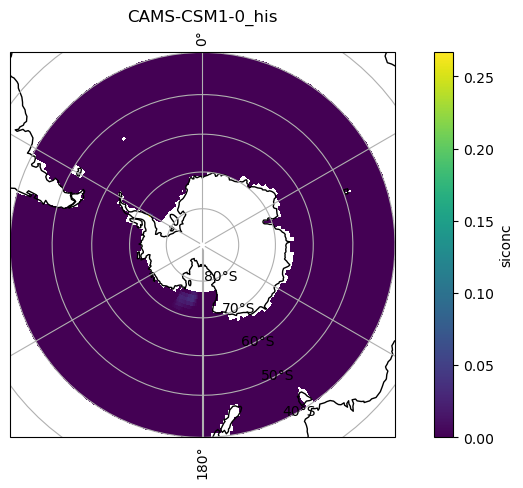

La variable 'siconc' est en %. Conversion en fraction.


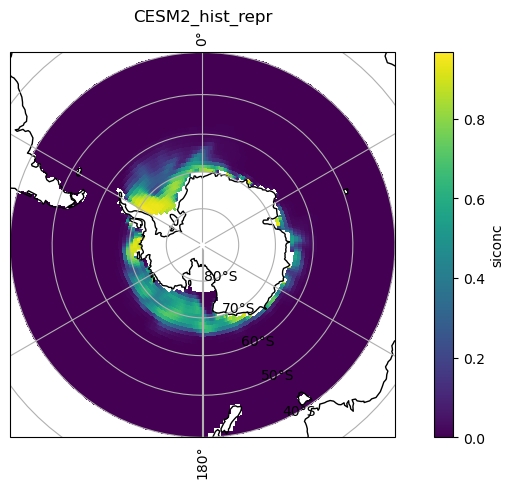

La variable 'siconc' est en %. Conversion en fraction.


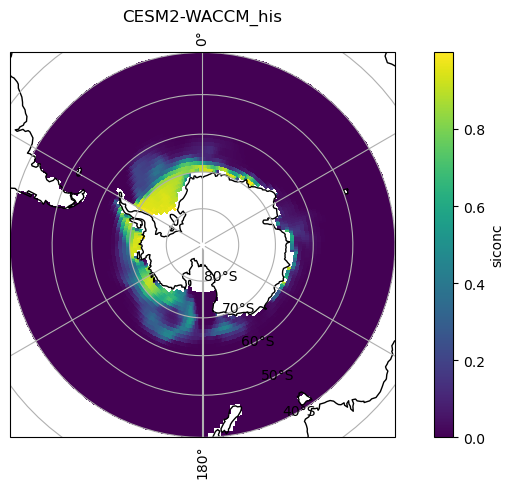

La variable 'siconc' est en %. Conversion en fraction.


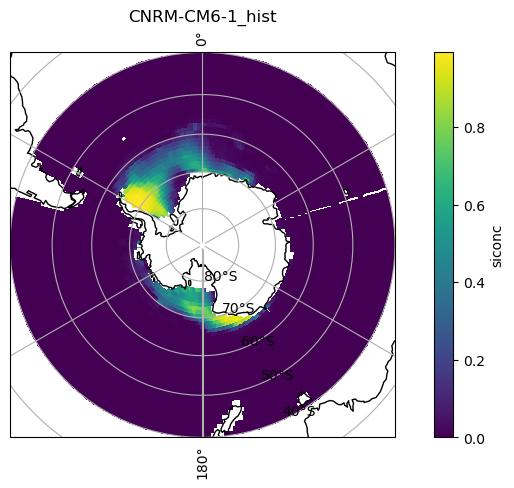

La variable 'siconc' est en %. Conversion en fraction.


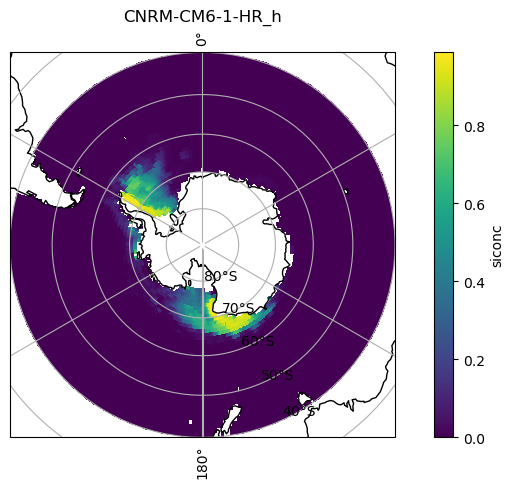

La variable 'siconc' est en %. Conversion en fraction.


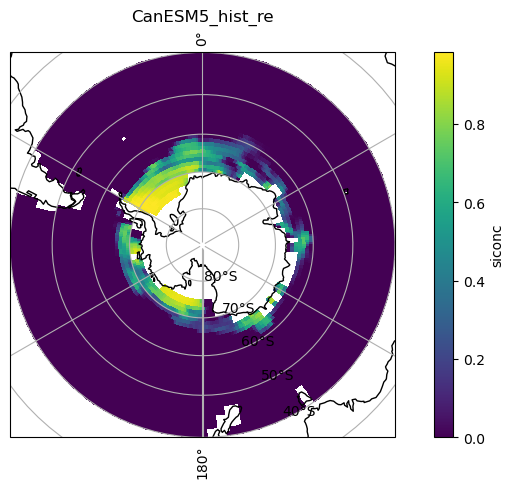

La variable 'siconc' est en %. Conversion en fraction.


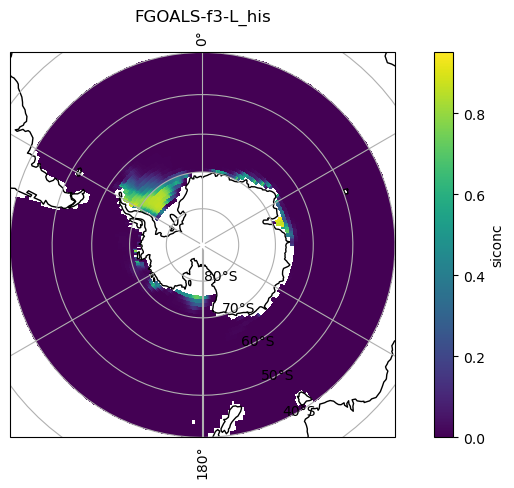

La variable 'siconc' est en %. Conversion en fraction.


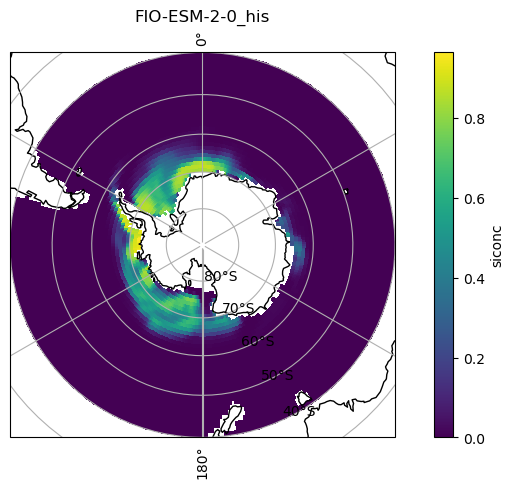

La variable 'siconc' est en %. Conversion en fraction.


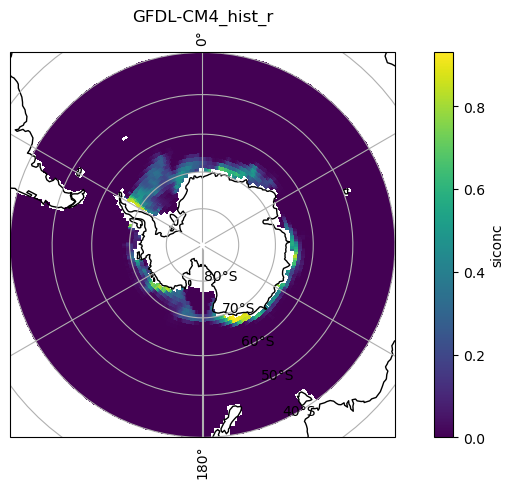

La variable 'siconc' est en %. Conversion en fraction.


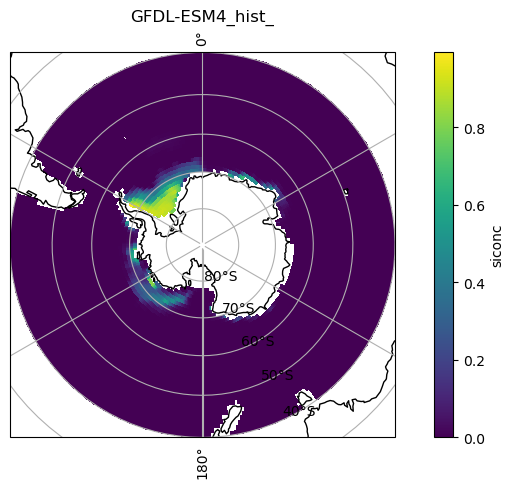

La variable 'siconc' est en %. Conversion en fraction.


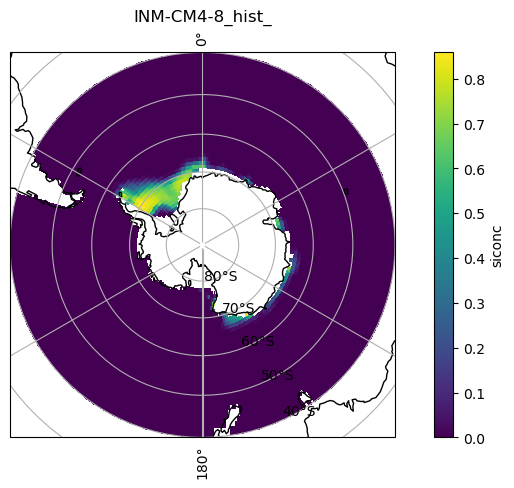

La variable 'siconc' est en %. Conversion en fraction.


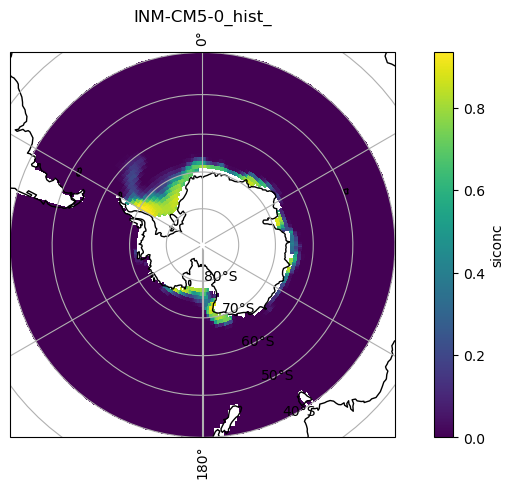

La variable 'siconc' est en %. Conversion en fraction.


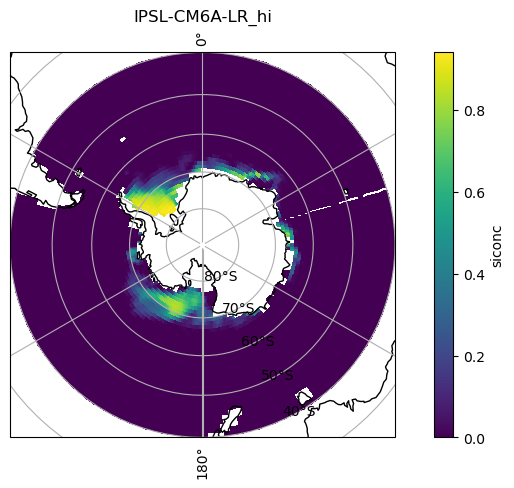

La variable 'siconc' est en %. Conversion en fraction.


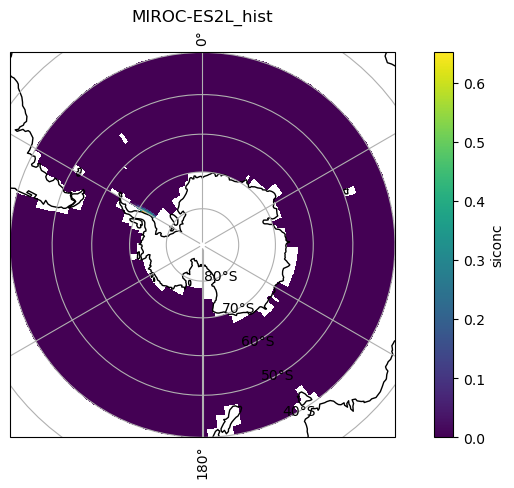

La variable 'siconc' est en %. Conversion en fraction.


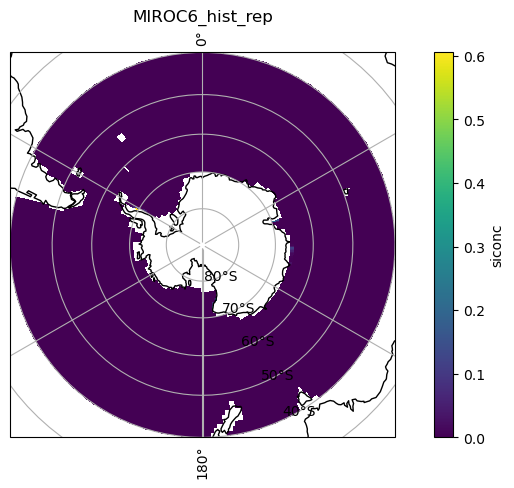

La variable 'siconc' est en %. Conversion en fraction.


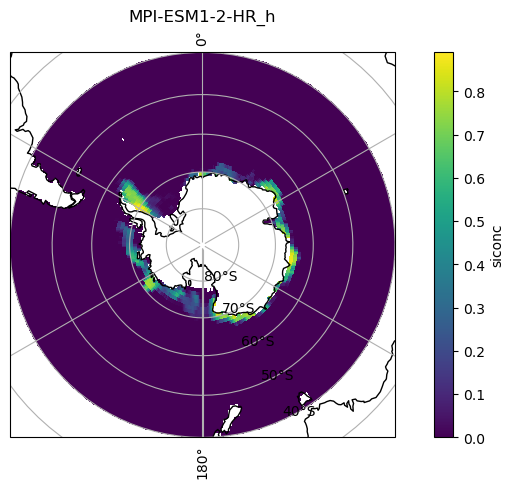

La variable 'siconc' est en %. Conversion en fraction.


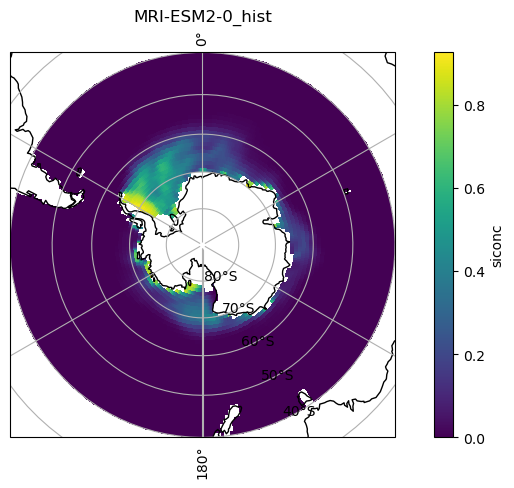

La variable 'siconc' est en %. Conversion en fraction.


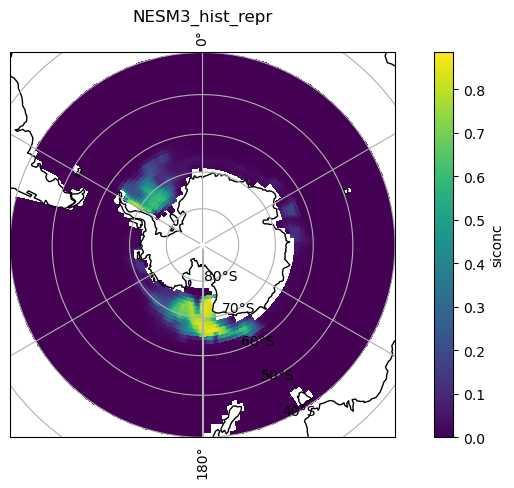

In [6]:
seaice_cover_dict = {}

for i, files in enumerate(nc_files):
    model_name = files.split("_")[0]
    
    path_siconc = os.path.join("/home/jovyan/private-storage/output_data/sea_ice_interp/", files)
    path_areacella = os.path.join("/home/jovyan/private-storage/output_data/areacella_recalcule", files.replace("hist_reprojete", "gridarea_hist_recalcule"))
    path_sftlf = os.path.join("/home/jovyan/private-storage/output_data/interp_sftlf/", files.replace("hist", "sftlf"))
                                 
    # use of functions defined in the module
    ds_siconc, ds_area, ds_sftlf = get_data(path_siconc, path_areacella, path_sftlf)
    siconc, seaice_cover, monthly_mean = extraction_variable_and_monthly_mean(ds_siconc, sftlf=ds_sftlf["sftlf"])
    areacella = ds_area["cell_area"]
    seaice_cover_km2 = seaice_surface_calculation(seaice_cover, areacella)
    seaice_cover_dict[model_name] = seaice_cover_km2

    plot_seaice_cover_basic_sh(siconc, title=files[:15])
    
    ds_siconc.close()
    ds_area.close()